# Data Mining & Machine Learning - Classification Part 2

### Case 1: Classification of Legendary Pokémon with Supervised Learning

83109 Samuel Didovic<br>
86368 Isabel Lober<br>
85915 Pascal Seitz<br>

Lecturer: Prof. Dr. Adrian Moriariu

## Table of Contents
1. [Step 0: Important not](#intro)
2. [Step 1: Data Exploration](#first)
    1. [1.1 Legendary Pokémon](#sub11)
    2. [1.2 Average Base Total Stats](#sub12)
    3. [1.3 Capture Rate](#sub13)
    4. [1.4 Gender](#sub14)
    5. [1.5 Distribution of types](#sub15)
    6. [1.6 Height and Weight](#sub16)
    7. [1.7 Base Happiness](#sub17)
    8. [1.8 Evolution](#sub18)
    9. [1.9 Strongest Pokémon](#sub19)
3. [Step 2: Features under consideration](#second)

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Step 0: Important note<a name = "intro"></a>

In [3]:
df = pd.read_csv("pokemon_cleaned.csv")

<br>

Replace NaN again, since reload the defined "None" values are automatically converted into NaN.<br>
However, a look into the CSV file confirms that the Feature Engineering worked. This is an issue by Python as far as the research tells.

In [4]:
df["type2"].fillna("None", inplace = True)
df["percentage_male"].fillna("None", inplace = True)

<br>

### Step 1: Data Exploration <a name = "first"></a>

This section is about exploring the dataset systematically and visually.<br>
The goal is to classify whether a Pokémon is a so called legendary Pokémon.<br>
Therefore, the dataset will be explored regarding features that might be useful for the prediction task later on.

#### 1.1 Legendary Pokémon <a name = "sub12"></a>

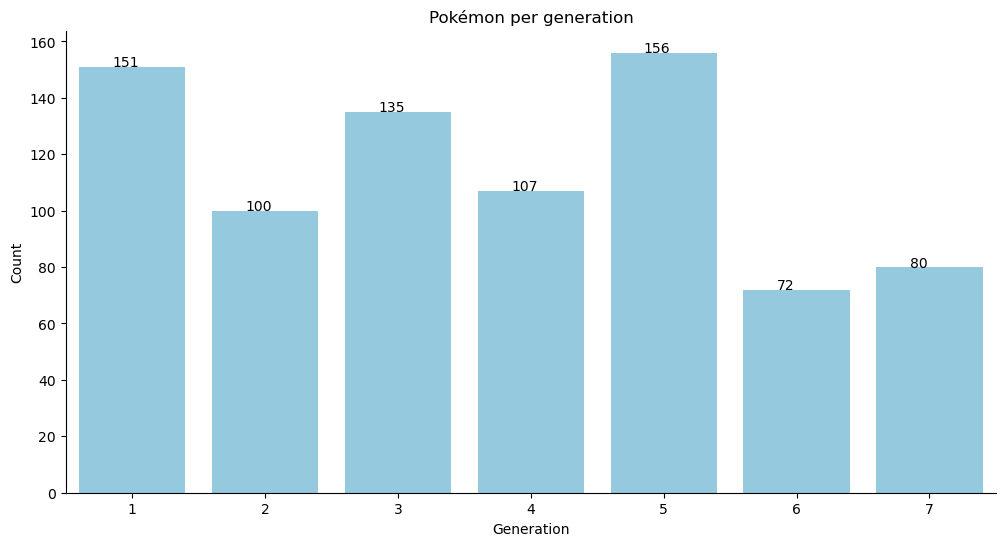

In [5]:
# Examine the count of all Pokémon per generation.

plt.figure(figsize = (12, 6))

ax = sns.countplot(x = "generation",
                  data = df,
                  color = "skyblue")

ax.set_title("Pokémon per generation")
ax.set(xlabel = "Generation", ylabel = "Count")

for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_height()),
               (p.get_x() + 0.25,
               p.get_height() + 0.05))
sns.despine()

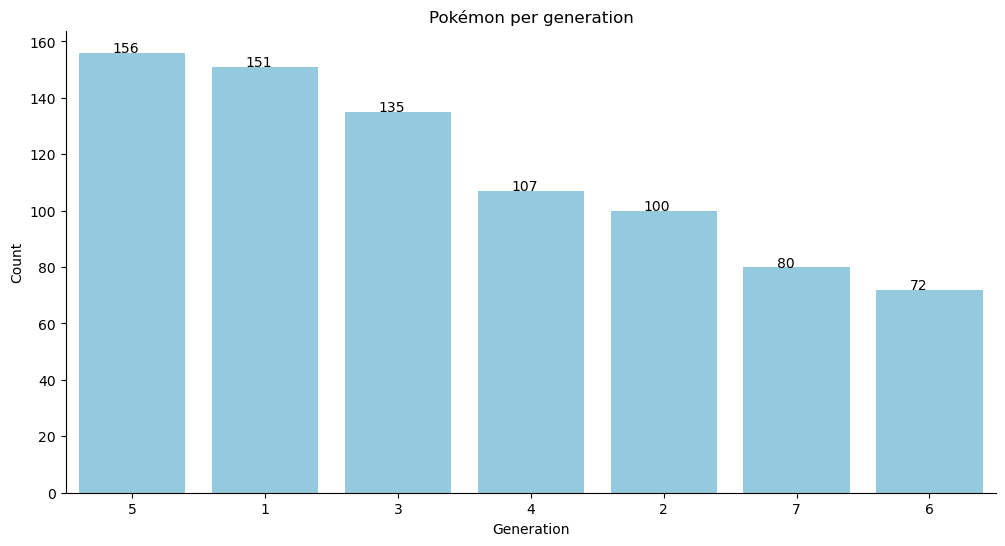

In [6]:
# Order the output.

plt.figure(figsize = (12, 6))

ax = sns.countplot(x = "generation",
                  data = df,
                  order = df["generation"].value_counts().index,
                  color = "skyblue")

ax.set_title("Pokémon per generation")
ax.set(xlabel = "Generation", ylabel = "Count")

for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_height()),
               (p.get_x() + 0.25,
               p.get_height() + 0.05))
sns.despine()

Now it is clear that Generation 5 introduced the most and Generation 6 the least new Pokémon.

In [7]:
# Legendary Pokémon.

legendary_pkmn = df["is_legendary"].sum()
legendary_pkmn

70

In [8]:
# Non-legendary Pokémon.

pkmn = df.count().iloc[0] # Count all Pokémon in dataset first.

non_legendary_pkmn = pkmn - legendary_pkmn
non_legendary_pkmn

731

In [9]:
pkmn

801

In sum there's a total number of **70 legendary Pokémon** among over 800 Pokémon in the dataset.

#### 1.2 Average Base Total Stats <a name = "sub12"></a>

In [10]:
# Create df's consisting of legendary and non-legendary Pokémon.
df_legendary = df[df["is_legendary"] == 1]
df_non_legendary = df[df["is_legendary"] == 0]

In [11]:
# Average base total for legendary Pokémon.
base_total_legendary = round(df_legendary["base_total"].mean(), 2)
print(f"Average Base Total Stats of legendary Pokémon: {base_total_legendary}")

# Average base total for non-legendary Pokémon.
base_total_non_legendary = round(df_non_legendary["base_total"].mean(), 2)
print(f"Average Base Total Stats of non-legendary Pokémon: {base_total_non_legendary}")

Average Base Total Stats of legendary Pokémon: 615.26
Average Base Total Stats of non-legendary Pokémon: 410.48


From this, one might draw that legendary Pokémon seem to have significant higher stats compared to non-legendary Pokémon.<br>
Thus, `base_total` may be of help for the prediction model later.

#### 1.3 Capture Rate <a name = "sub13"></a>

In [12]:
# Average capture rate for legendary Pokémon.
avg_cap_rate_legendary = round(df_legendary["capture_rate"].mean(), 2)
print(f"Average Capture Rate for legendary Pokémon: {avg_cap_rate_legendary}")

# Average capture rate for non-legendary Pokémon.
avg_cap_rate_non_legendary = round(df_non_legendary["capture_rate"].mean(), 2)
print(f"Average Capture Rate for non-legendary Pokémon: {avg_cap_rate_non_legendary}")

Average Capture Rate for legendary Pokémon: 17.99
Average Capture Rate for non-legendary Pokémon: 106.4


The analysis shows legendary Pokémon are harder to catch than non-legendary ones.<br>
It seems, that `capture_rate` may also be of use.<br>

Plot the findings.

In [13]:
# Define an overall correlation of the capture rate.
overall_capture_corr = df["capture_rate"].corr(df["is_legendary"])
print(f"Overall correlation: {overall_capture_corr}")

Overall correlation: -0.3276772302416779


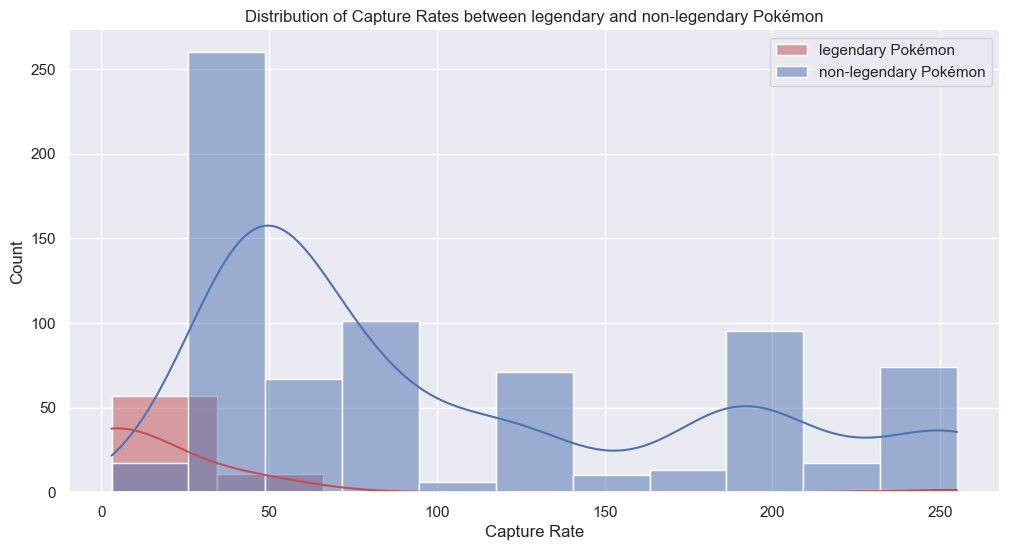

In [14]:
sns.set(rc = {"figure.figsize": (12, 6)})

sns.histplot(data = df_legendary,
            x = "capture_rate",
            kde = True,
            label = "legendary Pokémon",
            color = "r")

sns.histplot(data = df_non_legendary,
            x = "capture_rate",
            kde = True,
            label = "non-legendary Pokémon",
            color = "b")

plt.legend()
plt.title("Distribution of Capture Rates between legendary and non-legendary Pokémon")
plt.xlabel("Capture Rate")
plt.ylabel("Count")

sns.despine()

These findings state a negative correlation between the features `capture_rate` and `is_legendary`.<br>
With some background knowledge in Pokémon games, a lower capture rate indicates that a Pokémon isn't willing to be catched easily.<br>
Therefore, it is indeed worth examining the average capture rates of bothlegendaries and non-legendaries to get a glimpse of how the catch rates differing.

#### 1.4 Gender <a name = "sub14"></a>

In [15]:
# Percentage of genderless legendary Pokémon.
lgnd_pkmn_genderless_percentage = (df_legendary[df_legendary["percentage_male"] == "None"].shape[0] /
                                  df_legendary.shape[0]) * 100
print(f"Percentage of genderless legendary Pokémon: {np.round(lgnd_pkmn_genderless_percentage, 1)}%")

# Percentage of genederless non-legendary Pokémon.
non_lgnd_pkmn_genderless_percentage = (df_non_legendary[df_non_legendary["percentage_male"] == "None"].shape[0] /
                                  df_non_legendary.shape[0]) * 100
print(f"Percentage of genderless non-legendary Pokémon: {np.round(non_lgnd_pkmn_genderless_percentage, 1)}%")

Percentage of genderless legendary Pokémon: 90.0%
Percentage of genderless non-legendary Pokémon: 4.8%


With this, one could confidentaly say that most of the legendary Pokémon don't have a designated gender.<br>
This also seems like a good feature for the model later.

Plot the findings.

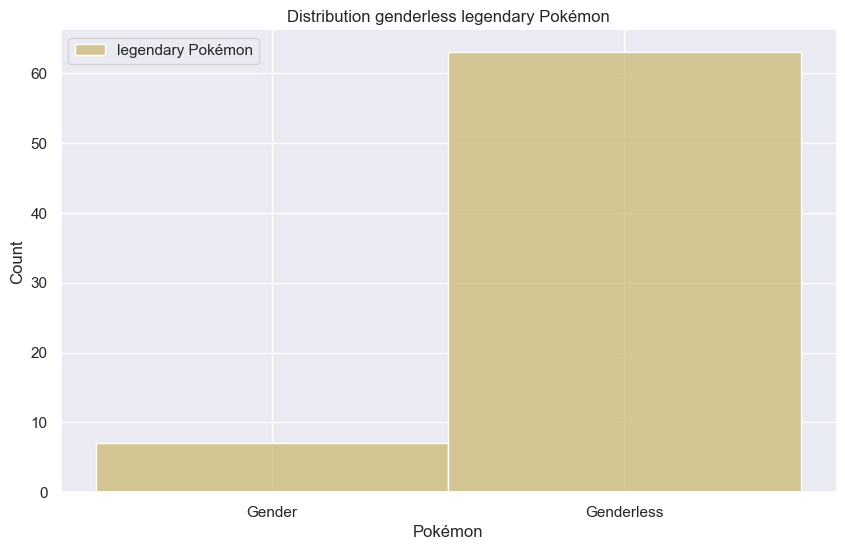

In [16]:
sns.set(rc = {"figure.figsize": (10, 6)})

sns.histplot(data = df[df["is_legendary"] == 1]["percentage_male"] == "None", 
             bins = 2,
             label = "legendary Pokémon",
             color = "y")

plt.legend()
plt.title("Distribution genderless legendary Pokémon")
plt.xlabel("Pokémon")
plt.ylabel("Count")
plt.xticks([0.25, 0.75], ["Gender", "Genderless"])

sns.despine()

#### 1.5 Distribution of types <a name = "sub15"></a>

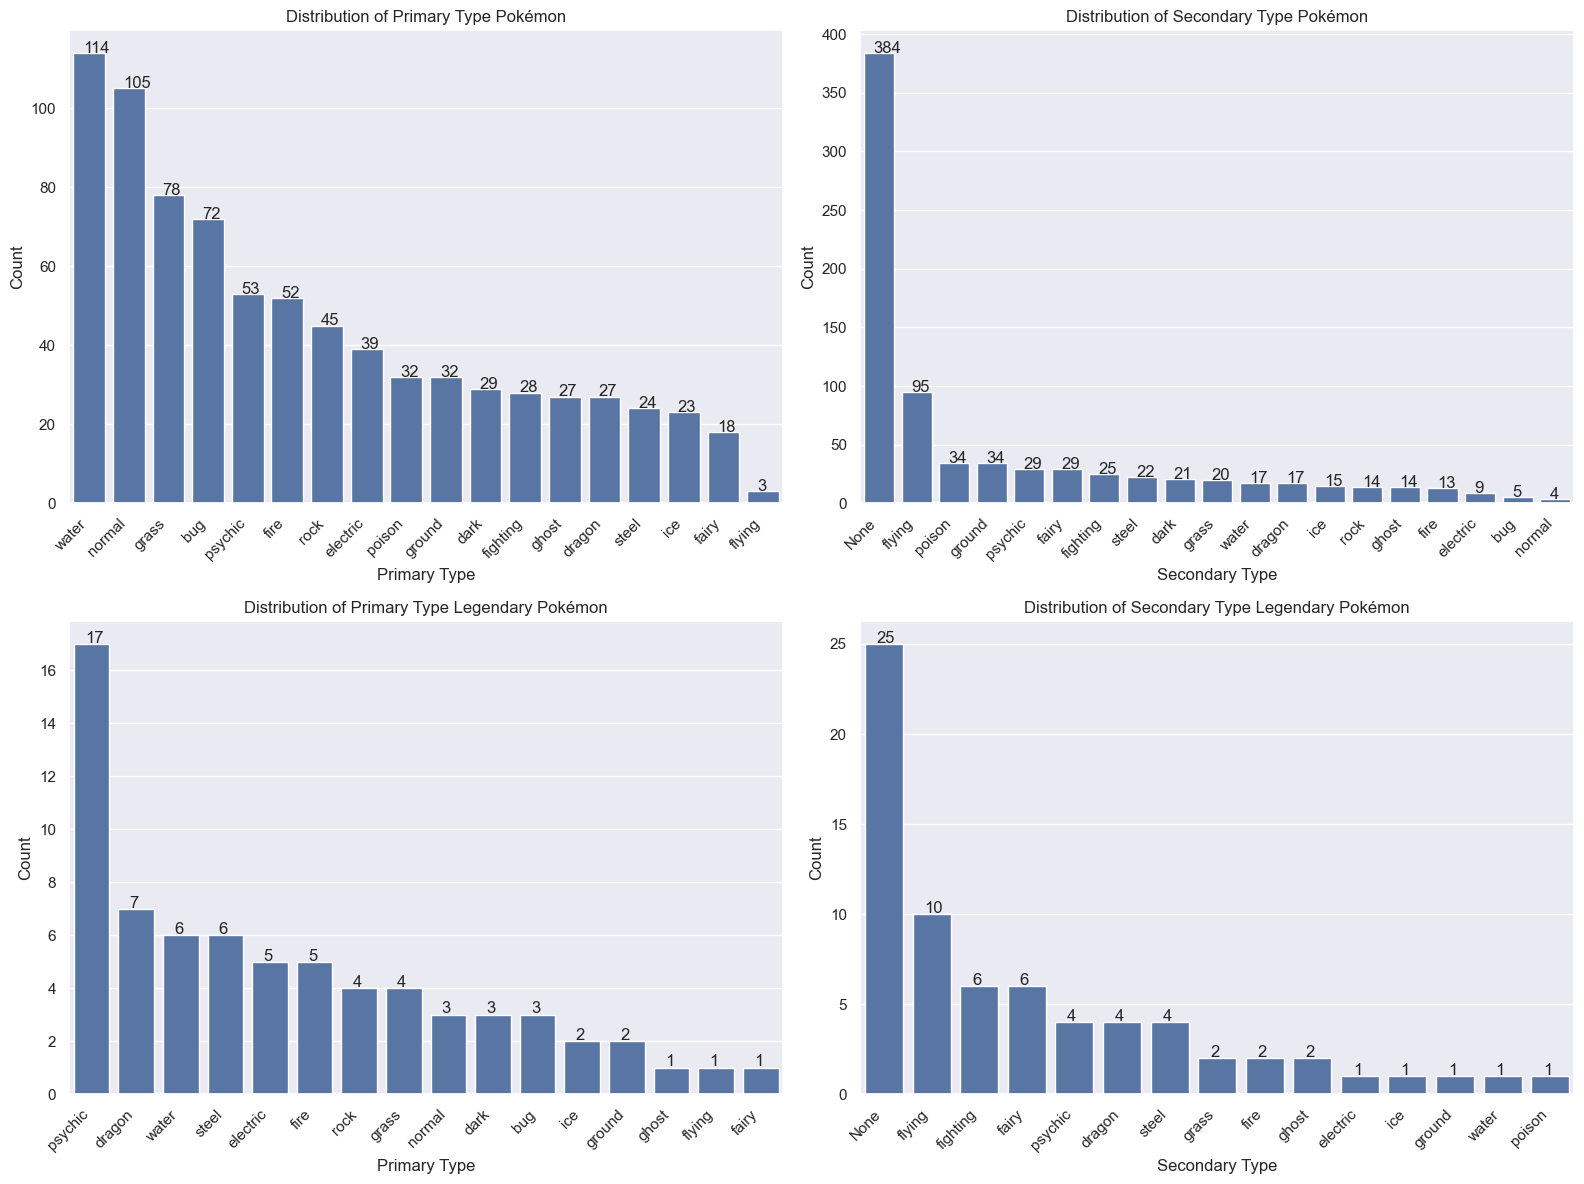

In [17]:
fig, axes = plt.subplots(2, 2, figsize = (16, 12))

# Overall Distribution.

distro_type = sns.countplot(x = "type1",
                           data = df,
                           order = df["type1"].value_counts().index,
                           ax = axes[0, 0])

axes[0, 0].set_title('Distribution of Primary Type Pokémon')
axes[0, 0].set_xlabel('Primary Type')
axes[0, 0].set_ylabel('Count')
plt.setp(axes[0, 0].get_xticklabels(), rotation = 45, ha = "right") # enhanced readability

for p in distro_type.patches:
    distro_type.annotate("{:.0f}".format(p.get_height()),
               (p.get_x() + 0.25,
               p.get_height() + 0.05))
    
distro_type = sns.countplot(x = "type2",
                           data = df,
                           order = df["type2"].value_counts().index,
                           ax = axes[0, 1])

axes[0, 1].set_title('Distribution of Secondary Type Pokémon')
axes[0, 1].set_xlabel('Secondary Type')
axes[0, 1].set_ylabel('Count')
plt.setp(axes[0, 1].get_xticklabels(), rotation = 45, ha = "right")

for p in distro_type.patches:
    distro_type.annotate("{:.0f}".format(p.get_height()),
               (p.get_x() + 0.25,
               p.get_height() + 0.05))  
    
# Legendary Distribution.

distro_type = sns.countplot(x = "type1",
                           data = df_legendary,
                           order = df_legendary["type1"].value_counts().index,
                           ax = axes[1, 0])

axes[1, 0].set_title('Distribution of Primary Type Legendary Pokémon')
axes[1, 0].set_xlabel('Primary Type')
axes[1, 0].set_ylabel('Count')
plt.setp(axes[1, 0].get_xticklabels(), rotation = 45, ha = "right")

for p in distro_type.patches:
    distro_type.annotate("{:.0f}".format(p.get_height()),
               (p.get_x() + 0.25,
               p.get_height() + 0.05))
    
distro_type = sns.countplot(x = "type2",
                           data = df_legendary,
                           order = df_legendary["type2"].value_counts().index,
                           ax = axes[1, 1])

axes[1, 1].set_title('Distribution of Secondary Type Legendary Pokémon')
axes[1, 1].set_xlabel('Secondary Type')
axes[1, 1].set_ylabel('Count')
plt.setp(axes[1, 1].get_xticklabels(), rotation = 45, ha = "right")

for p in distro_type.patches:
    distro_type.annotate("{:.0f}".format(p.get_height()),
               (p.get_x() + 0.25,
               p.get_height() + 0.05))

plt.tight_layout()
plt.show()

It turns out that over all Pokémon in the dataset water is the most common primary type with flying being the least common.<br>
Interestingly, flying is the most common secondary type.<br>
As for the legendary Pokémon, psychic is the most common primary type and flying being the most common secondary type, as it is for all Pokémon.<br>
If these features are suitable for prediction tasks need to be discussed first. However, it was worth getting an appropriate overview anyway.

#### 1.6 Height and Weight<a name = "sub16"></a>

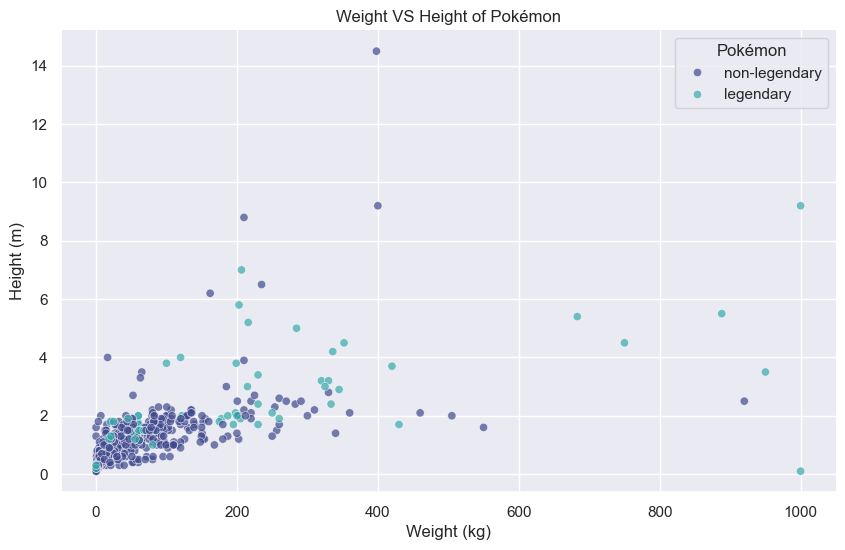

In [18]:
# Create a plot.
sns.set(rc = {"figure.figsize": (10, 6)})

scatter = sns.scatterplot(data = df,
                           x = "weight_kg",
                           y = "height_m",
                           hue = "is_legendary",
                           palette = "mako",
                           alpha = 0.7)

scatter.set_title("Weight VS Height of Pokémon")
scatter.set_xlabel("Weight (kg)")
scatter.set_ylabel("Height (m)")

# Custom legend settings.
legend_labels = {"0": "non-legendary", "1" : "legendary"}
handles, labels = scatter.get_legend_handles_labels()
labels = [legend_labels[label] for label in labels]
scatter.legend(handles = handles, labels = labels, title = "Pokémon")

sns.despine()

Based on this scatter plot's outcome there's a tendency are larger and weigh more.<br>
These features could be suitable for the prediction.

#### 1.7 Base Happiness <a name = "sub17"></a>

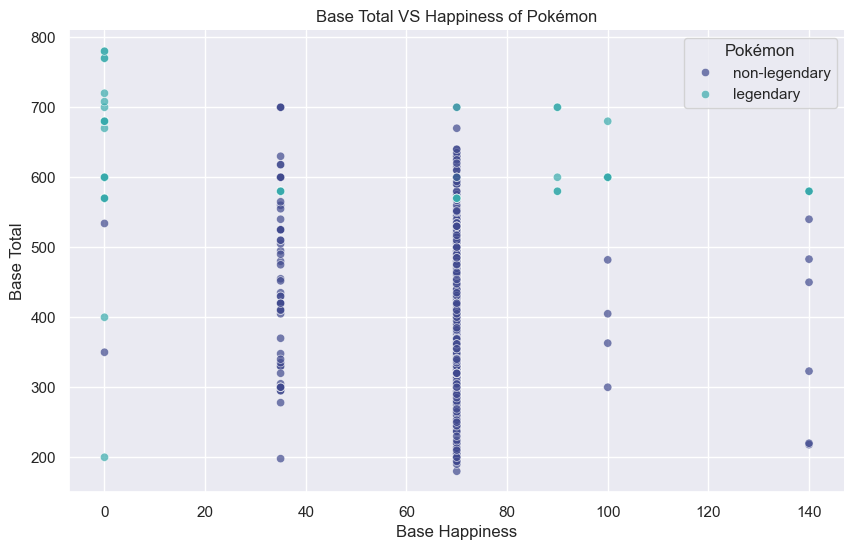

In [19]:
# Create a plot.
sns.set(rc = {"figure.figsize": (10, 6)})

scatter = sns.scatterplot(data = df,
                           x = "base_happiness",
                           y = "base_total",
                           hue = "is_legendary",
                           palette = "mako",
                           alpha = 0.7)

scatter.set_title("Base Total VS Happiness of Pokémon")
scatter.set_xlabel("Base Happiness")
scatter.set_ylabel("Base Total")

# Custom legend settings.
legend_labels = {"0": "non-legendary", "1" : "legendary"}
handles, labels = scatter.get_legend_handles_labels()
labels = [legend_labels[label] for label in labels]
scatter.legend(handles = handles, labels = labels, title = "Pokémon")

sns.despine()

This one seems also useful. It states that most of the legendary Pokémon have a really low base happiness.

#### 1.8 Evolution <a name = "sub18"></a>

In [20]:
df_evolution_line = df[["name", "attack", "base_total"]]
df_evolution_line

,name,attack,base_total
0,Bulbasaur,49,318
1,Ivysaur,62,405
2,Venusaur,100,625
3,Charmander,52,309
4,Charmeleon,64,405
...,...,...,...
796,Celesteela,101,570
797,Kartana,181,570
798,Guzzlord,101,570
799,Necrozma,107,600


In [21]:
df_f = df_evolution_line.iloc[:3]
df_f

,name,attack,base_total
0,Bulbasaur,49,318
1,Ivysaur,62,405
2,Venusaur,100,625


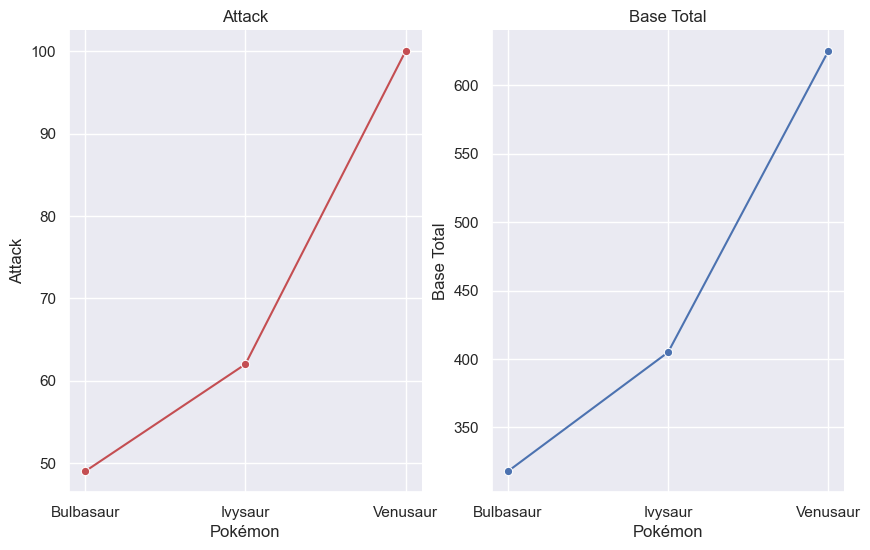

In [22]:
# Create a plot
sns.set(rc = {"figure.figsize": (10, 6)})

# Plot "attack" feature
plt.subplot(1, 2, 1)

line = sns.lineplot(data = df_f,
            x = "name",
            y = "attack",
            marker = "o",
            color = "r")

line.set_title("Attack")
line.set_xlabel("Pokémon")
line.set_ylabel("Attack")

# Plot "base_total" feature
plt.subplot(1, 2, 2)

line_2 = sns.lineplot(data = df_f,
            x = "name",
            y = "base_total",
            marker = "o",
            color = "b")

line_2.set_title("Base Total")
line_2.set_xlabel("Pokémon")
line_2.set_ylabel("Base Total")

sns.despine()

It seems that stats increasing as Pokémon evolve.

#### 1.9 Strongest Pokémon <a name = "sub19"></a>

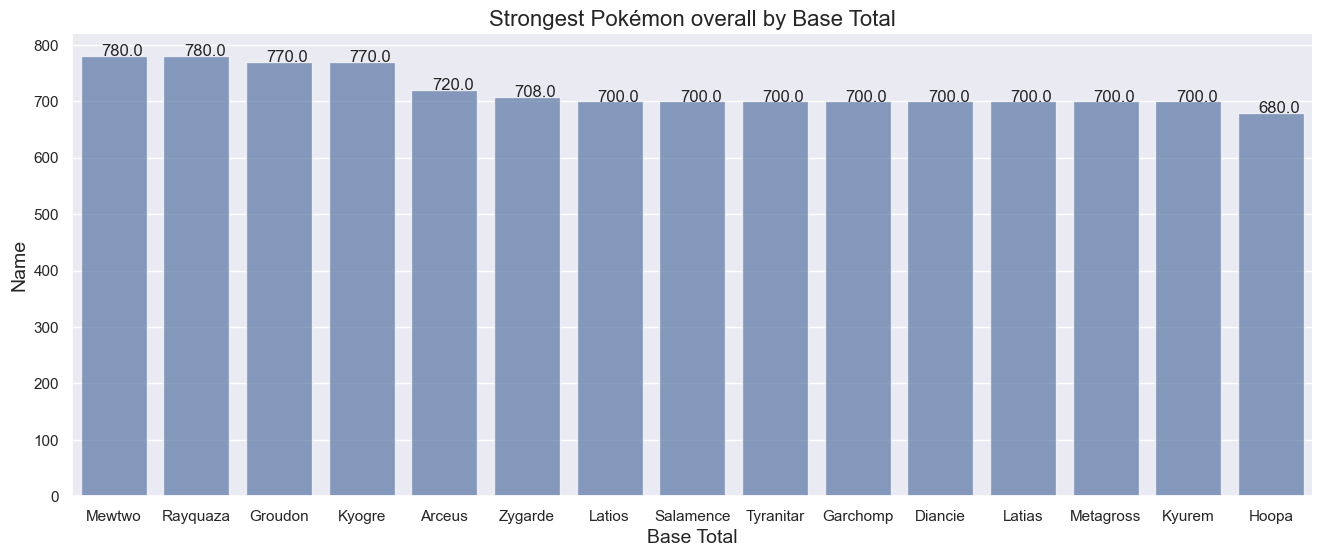

In [23]:
# Define Top 15 strongest Pokémon.
top_15_base_total = df.sort_values(by = "base_total", ascending = False).reset_index()[:15]

# Create a plot.
sns.set(rc = {"figure.figsize": (16, 6)})

ax = sns.barplot(data = top_15_base_total,
                           x = "name",
                           y = "base_total",
                           alpha = 0.7)

ax.set_title("Strongest Pokémon overall by Base Total", size = 16)
ax.set_xlabel("Base Total", size = 14)
ax.set_ylabel("Name", size = 14)

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),
               (p.get_x() + 0.25,
               p.get_height() + 0.05))
    
sns.despine()

Among these 15 Pokémon are 11 legendary Pokémon. With some background knowledge one may see **Salamence**, **Tyranitar**, **Garchomp** and **Metagross**. Despite being non-legendary Pokémon, they have a high Base Total value however.<br>
Based on these outcomes it seems clear that `base_total` is a good feature. However, the model should not only rely on this, since there are non-legendary Pokémon on par with stats of legendary Pokémon.

### Step 2: Features under consideration<a name = "second"></a>

Based on this comprehensive EDA the following features are considered for the prediction model:
- `attack`
- `base_happiness`
- `base_total`
- `capture_rate`
- `defense`
- `height_m`
- `hp`
- `sp_attack`
- `sp_defense`
- `speed`
- `weight_kg`
- `genderless`

The target variable will be `is_legendary`.